In [435]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
import sklearn

from itertools import *
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [2]:
df = pd.read_csv('movie_metadata.csv')

In [3]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [4]:
df.color.unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [5]:
df.describe()

num_critic_for_reviews     duration  director_facebook_likes  actor_3_facebook_likes  actor_1_facebook_likes         gross  num_voted_users  cast_total_facebook_likes  facenumber_in_poster  num_user_for_reviews        budget   title_year  actor_2_facebook_likes   imdb_score  aspect_ratio  movie_facebook_likes
count             4993.000000  5028.000000              4939.000000             5020.000000             5036.000000  4.159000e+03     5.043000e+03                5043.000000           5030.000000           5022.000000  4.551000e+03  4935.000000             5030.000000  5043.000000   4714.000000           5043.000000
mean               140.194272   107.201074               686.509212              645.009761             6560.047061  4.846841e+07     8.366816e+04                9699.063851              1.371173            272.770808  3.975262e+07  2002.470517             1651.754473     6.442138      2.220403           7525.964505
std                121.601675    25.197441              2813.328607             1665.041728            15020.759120  6.845299e+07     1.384853e+05               18163.799124              2.013576            377.982886  2.061149e+08    12.474599             4042.438863     1.125116      1.385113          19320.445110
min                  1.000000     7.000000                 0.000000                0.000000                0.000000  1.620000e+02     5.000000e+00                   0.000000              0.000000              1.000000  2.180000e+02  1916.000000                0.000000     1.600000      1.180000              0.000000
25%                 50.000000    93.000000                 7.000000              133.000000              614.000000  5.340988e+06     8.593500e+03                1411.000000              0.000000             65.000000  6.000000e+06  1999.000000              281.000000     5.800000      1.850000              0.000000
50%                110.000000   103.000000                49.000000              371.500000              988.000000  2.551750e+07     3.435900e+04                3090.000000              1.000000            156.000000  2.000000e+07  2005.000000              595.000000     6.600000      2.350000            166.000000
75%                195.000000   118.000000               194.500000              636.000000            11000.000000  6.230944e+07     9.630900e+04               13756.500000              2.000000            326.000000  4.500000e+07  2011.000000              918.000000     7.200000      2.350000           3000.000000
max                813.000000   511.000000             23000.000000            23000.000000           640000.000000  7.605058e+08     1.689764e+06              656730.000000             43.000000           5060.000000  1.221550e+10  2016.000000           137000.000000     9.500000     16.000000         349000.000000

In [6]:
df.corr()

num_critic_for_reviews  duration  director_facebook_likes  actor_3_facebook_likes  actor_1_facebook_likes     gross  num_voted_users  cast_total_facebook_likes  facenumber_in_poster  num_user_for_reviews    budget  title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes
num_critic_for_reviews                   1.000000  0.258486                 0.180674                0.271646                0.190016  0.480601         0.624943                   0.263203             -0.033897              0.609387  0.119994    0.275707                0.282306    0.305303     -0.049786              0.683176
duration                                 0.258486  1.000000                 0.173296                0.123558                0.088449  0.250298         0.314765                   0.123074              0.013469              0.328403  0.074276   -0.135038                0.131673    0.261662     -0.090071              0.196605
director_facebook_likes                  0.180674  0.173296                 1.000000                0.120199                0.090723  0.144945         0.297057                   0.119549             -0.041268              0.221890  0.021090   -0.063820                0.119601    0.170802      0.001642              0.162048
actor_3_facebook_likes                   0.271646  0.123558                 0.120199                1.000000                0.249927  0.308026         0.287239                   0.473920              0.099368              0.230189  0.047451    0.096137                0.559662    0.052633     -0.003366              0.278844
actor_1_facebook_likes                   0.190016  0.088449                 0.090723                0.249927                1.000000  0.154468         0.192804                   0.951661              0.072257              0.145461  0.022639    0.086873                0.390487    0.076099     -0.020049              0.135348
gross                                    0.480601  0.250298                 0.144945                0.308026                0.154468  1.000000         0.637271                   0.247400             -0.027755              0.559958  0.102179    0.030886                0.262768    0.198021      0.069346              0.378082
num_voted_users                          0.624943  0.314765                 0.297057                0.287239                0.192804  0.637271         1.000000                   0.265911             -0.026998              0.798406  0.079621    0.007397                0.270790    0.410965     -0.014761              0.537924
cast_total_facebook_likes                0.263203  0.123074                 0.119549                0.473920                0.951661  0.247400         0.265911                   1.000000              0.091475              0.206923  0.036557    0.109971                0.628404    0.085787     -0.017885              0.209786
facenumber_in_poster                    -0.033897  0.013469                -0.041268                0.099368                0.072257 -0.027755        -0.026998                   0.091475              1.000000             -0.069018 -0.019559    0.061504                0.071228   -0.062958      0.013713              0.008918
num_user_for_reviews                     0.609387  0.328403                 0.221890                0.230189                0.145461  0.559958         0.798406                   0.206923             -0.069018              1.000000  0.084292   -0.003147                0.219496    0.292475     -0.024719              0.400594
budget                                   0.119994  0.074276                 0.021090                0.047451                0.022639  0.102179         0.079621                   0.036557             -0.019559              0.084292  1.000000    0.045726                0.044236    0.030688      0.006598              0.062039
title_year                               0.275707 -0.135038                -0.063820                0.096137                0.0

In [7]:
df_no_missing = df.dropna()

In [8]:
df_no_missing.corr()

num_critic_for_reviews  duration  director_facebook_likes  actor_3_facebook_likes  actor_1_facebook_likes     gross  num_voted_users  cast_total_facebook_likes  facenumber_in_poster  num_user_for_reviews    budget  title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes
num_critic_for_reviews                   1.000000  0.228631                 0.175128                0.252782                0.165986  0.464187         0.592473                   0.236533             -0.034365              0.563684  0.104717    0.420202                0.253125    0.347886      0.180230              0.705226
duration                                 0.228631  1.000000                 0.180644                0.125797                0.083632  0.245726         0.339592                   0.120179              0.026919              0.351595  0.068012   -0.130211                0.128935    0.366221      0.153027              0.215303
director_facebook_likes                  0.175128  0.180644                 1.000000                0.117405                0.089630  0.138351         0.299624                   0.118547             -0.048067              0.217103  0.018167   -0.044656                0.116058    0.192314      0.037528              0.161962
actor_3_facebook_likes                   0.252782  0.125797                 0.117405                1.000000                0.252408  0.299864         0.267762                   0.489795              0.106189              0.205343  0.039966    0.117475                0.553755    0.065544      0.046356              0.271508
actor_1_facebook_likes                   0.165986  0.083632                 0.089630                0.252408                1.000000  0.144010         0.179590                   0.944813              0.057387              0.121935  0.016418    0.096194                0.391166    0.093597      0.056946              0.130300
gross                                    0.464187  0.245726                 0.138351                0.299864                0.144010  1.000000         0.624949                   0.235601             -0.032025              0.544674  0.099496    0.054808                0.252842    0.214740      0.063946              0.366933
num_voted_users                          0.592473  0.339592                 0.299624                0.267762                0.179590  0.624949         1.000000                   0.249119             -0.032209              0.778881  0.065927    0.023687                0.244822    0.482430      0.084626              0.517751
cast_total_facebook_likes                0.236533  0.120179                 0.118547                0.489795                0.944813  0.235601         0.249119                   1.000000              0.080687              0.178675  0.028682    0.127045                0.642991    0.106803      0.068952              0.205564
facenumber_in_poster                    -0.034365  0.026919                -0.048067                0.106189                0.057387 -0.032025        -0.032209                   0.080687              1.000000             -0.080971 -0.021673    0.070093                0.073098   -0.065493      0.018988              0.015185
num_user_for_reviews                     0.563684  0.351595                 0.217103                0.205343                0.121935  0.544674         0.778881                   0.178675             -0.080971              1.000000  0.070372    0.019470                0.187016    0.325003      0.098109              0.370465
budget                                   0.104717  0.068012                 0.018167                0.039966                0.016418  0.099496         0.065927                   0.028682             -0.021673              0.070372  1.000000    0.047138                0.035715    0.029190      0.025264              0.052490
title_year                               0.420202 -0.130211                -0.044656                0.117475                0.0

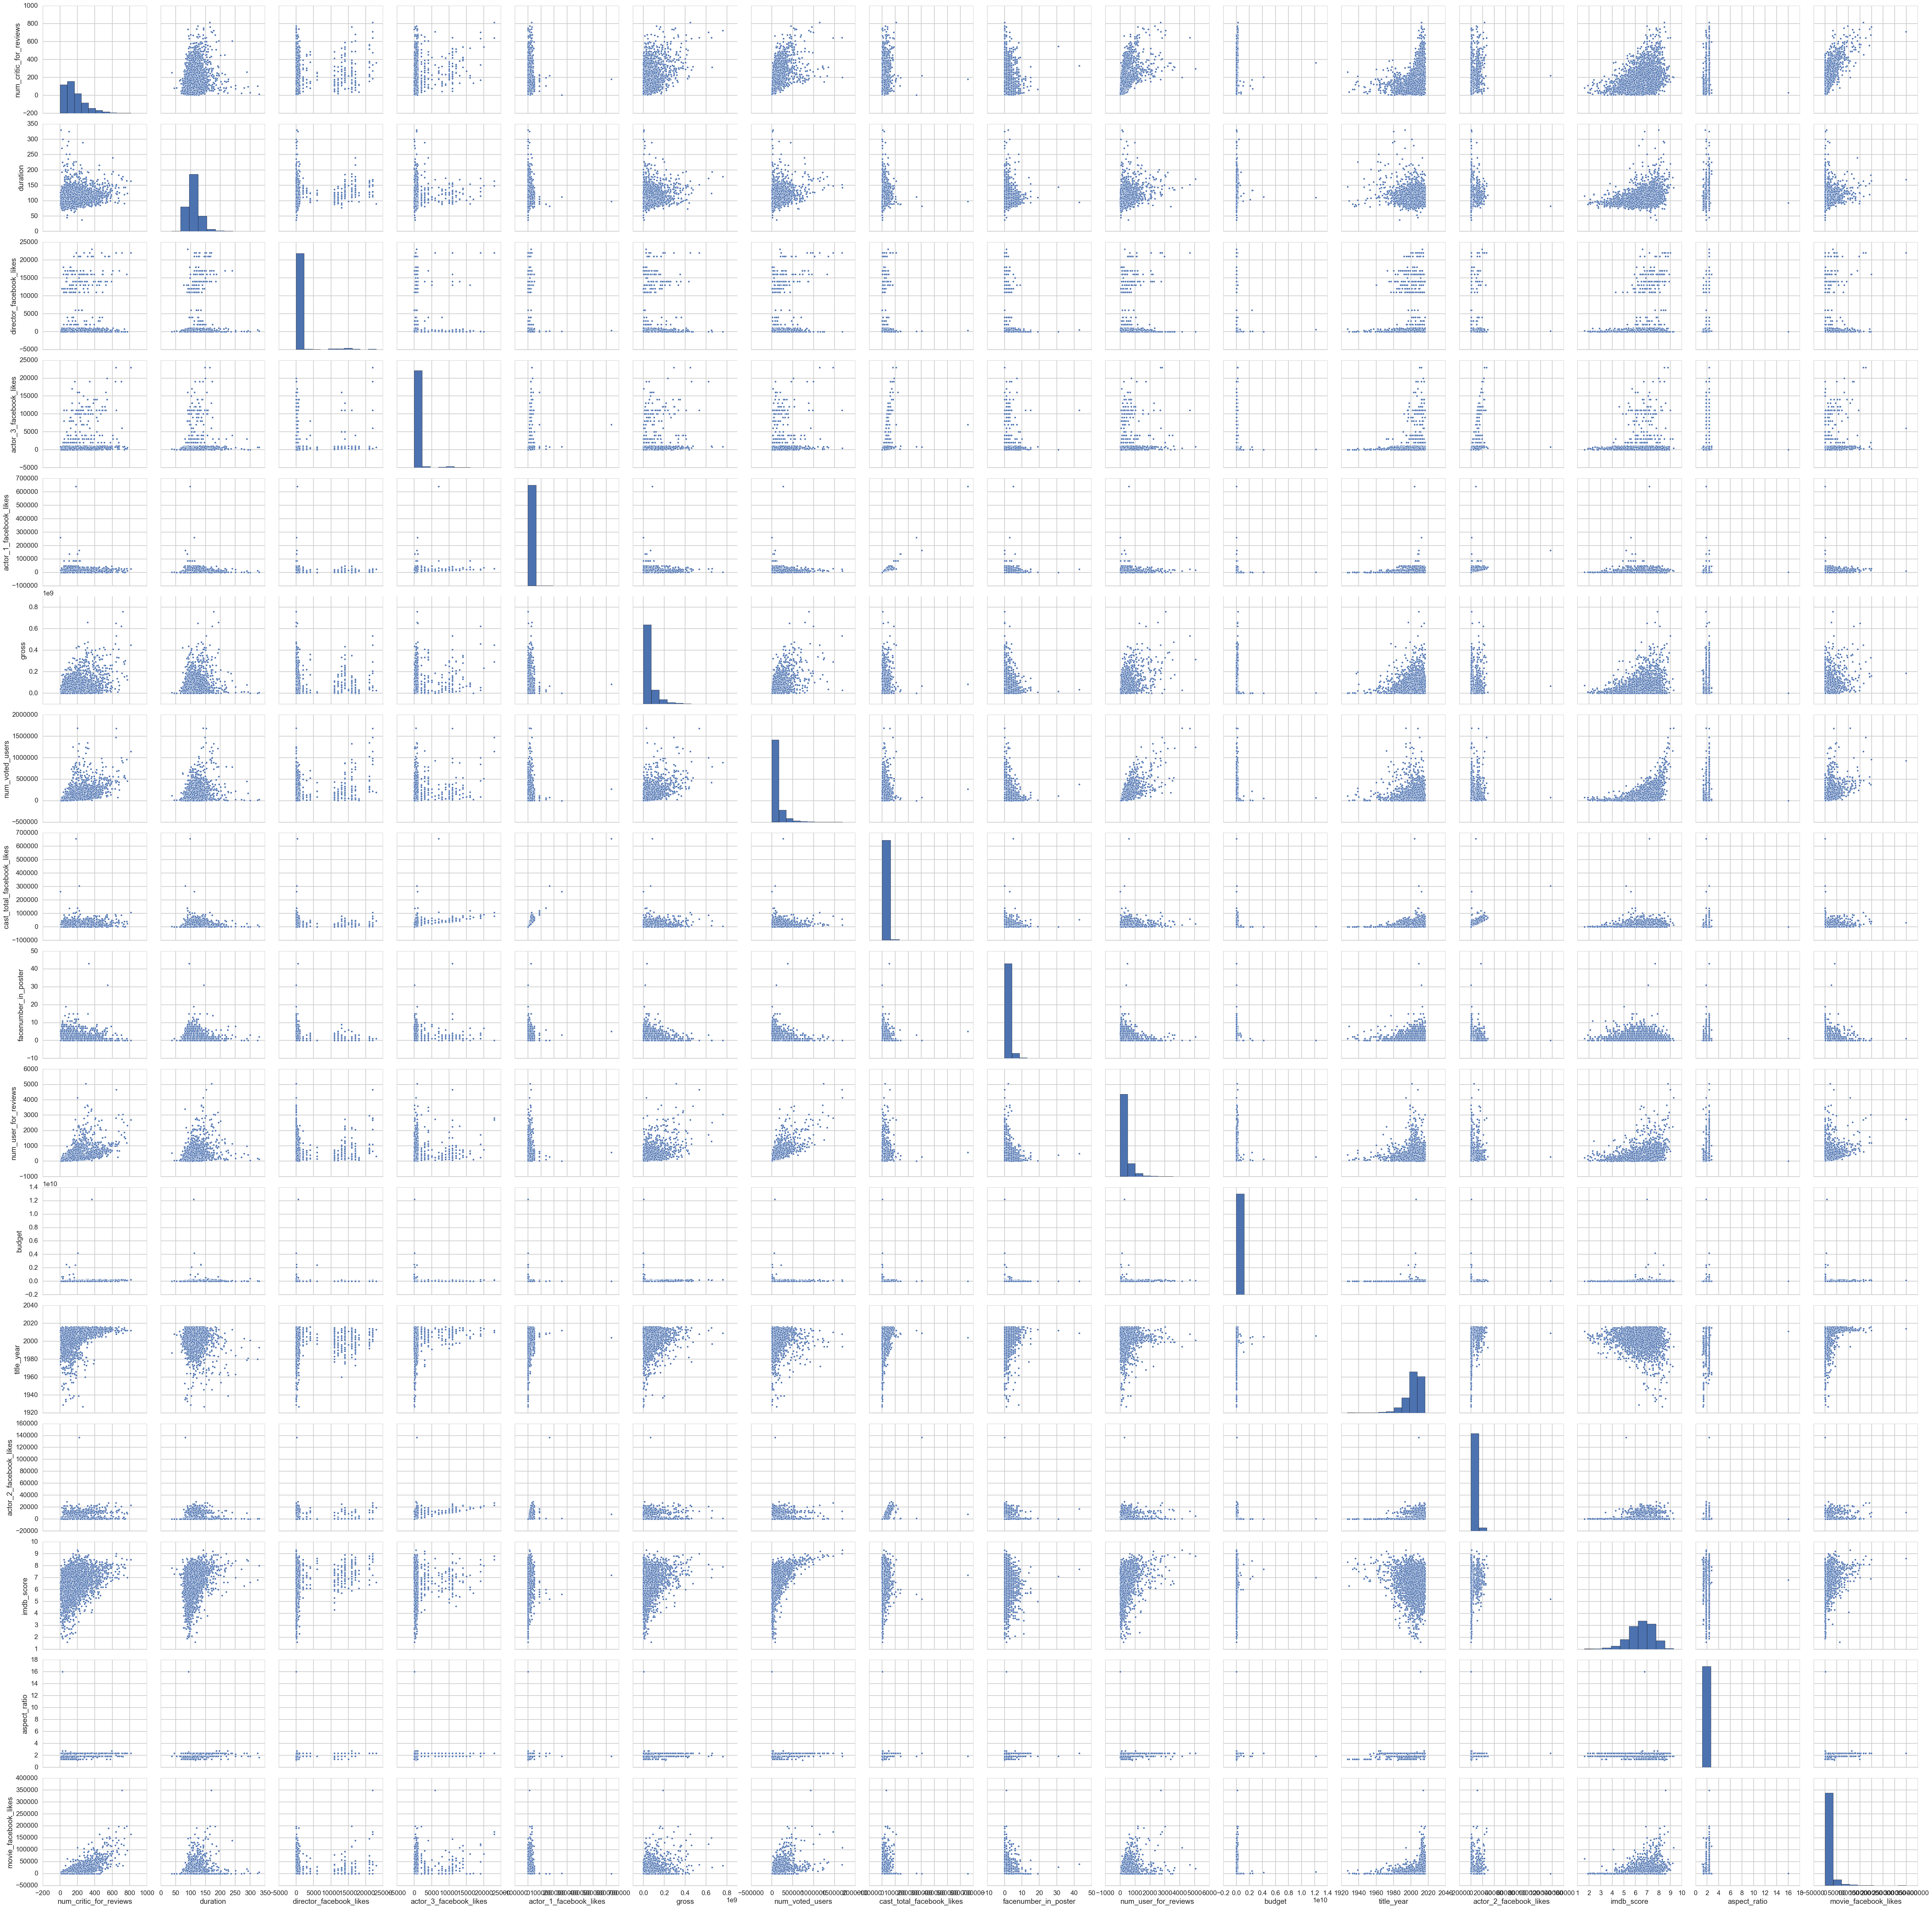

In [60]:
sns.pairplot(df_no_missing, size = 4)

## Regular Linear Regression

In [43]:
from sklearn import linear_model
df_lm_x = df_lm.drop(['imdb_score'], axis = 1)
df_lm_y = df_lm['imdb_score']

In [44]:
df_lm = df_no_missing.select_dtypes(include=['float64', 'int64'])
lm = linear_model.LinearRegression()

In [45]:
lm.fit(df_lm.drop(['imdb_score'], axis = 1), df_lm['imdb_score'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
sklearn.metrics.r2_score(df_lm['imdb_score'], lm.predict(df_lm.drop(['imdb_score'], axis = 1)))

0.36454442180797908

## Ridge Regression

In [13]:
rg = linear_model.Ridge(alpha = 0.1)
rg.fit(df_lm.drop(['imdb_score'], axis = 1), df_lm['imdb_score'])

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [14]:
sklearn.metrics.r2_score(df_lm['imdb_score'], rg.predict(df_lm.drop(['imdb_score'], axis = 1)))

0.36454442178582847

## Lasso Regression (shrinkage :0.01)

In [15]:
lasso = linear_model.Lasso(alpha = 0.01)
lasso.fit(df_lm.drop(['imdb_score'], axis = 1), df_lm['imdb_score'])
sklearn.metrics.r2_score(df_lm['imdb_score'], lasso.predict(df_lm.drop(['imdb_score'], axis = 1)))

C:\Users\Seuphor\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


0.36411096722520553

## Beyasian Ridge Regression

In [16]:
Bay = linear_model.BayesianRidge()
Bay.fit(df_lm.drop(['imdb_score'], axis = 1), df_lm['imdb_score'])
sklearn.metrics.r2_score(df_lm['imdb_score'], Bay.predict(df_lm.drop(['imdb_score'], axis = 1)))

0.36370499353503694

## Polynomial Regression

In [18]:
X = df_lm.drop(['imdb_score'], axis = 1)
y = df_lm['imdb_score']

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
              

In [19]:
clf = linear_model.LinearRegression()
clf.fit(X_, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
sklearn.metrics.r2_score(y, clf.predict(X_))

0.43728282170575805

## Select Features

In [191]:
df_lm_x = df_lm_x.drop(['title_year'], axis=1)

In [193]:
from sklearn.feature_selection import RFE

lm = linear_model.LinearRegression()
rfe = RFE(lm, 1)
rfe = rfe.fit(df_lm_x, df_lm_y)

In [194]:
type(rfe)

sklearn.feature_selection.rfe.RFE

In [195]:
type(rfe)

sklearn.feature_selection.rfe.RFE

In [196]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False], dtype=bool)

In [197]:
rfe.ranking_

array([ 4,  3, 10,  6,  8, 13, 11,  9,  2,  5, 14,  7,  1, 12])

In [439]:
list_df5 = []
for x in range(5):

    loc = np.where(rfe.ranking_ == x + 1)[0][0]
    list_df5.append(df_lm_x.iloc[:,loc])
    print(loc)

12
8
1
0
9


In [440]:
df_5 = pd.DataFrame(list_df5).T

## Test result of different feature selections

In [441]:
#a = combinations('012', 2)
#for numb in a:
#    list_new = []
#    for n in numb:
#        n = int(n)
#        list_new.append(df_5.iloc[:,int(n)])
#        print('update')
#    df_new = pd.DataFrame(list_new).T
#    print(df_new.head())

In [442]:
df_5['imdb_score'] = df_lm_y

In [443]:
df_5.head()

aspect_ratio  facenumber_in_poster  duration  num_critic_for_reviews  num_user_for_reviews  imdb_score
0          1.78                   0.0     178.0                   723.0                3054.0         7.9
1          2.35                   0.0     169.0                   302.0                1238.0         7.1
2          2.35                   1.0     148.0                   602.0                 994.0         6.8
3          2.35                   0.0     164.0                   813.0                2701.0         8.5
5          2.35                   1.0     132.0                   462.0                 738.0         6.6

In [489]:
itrain, itest = train_test_split(df_5, test_size = 0.2, random_state=66)

In [490]:
n_folds=4
overall_result = []
comb_list = []
for x in range(2,6):
    a = combinations('01234', x)
    for numb in a:
        list_new = []
        comb_list.append(numb)
        for n in numb:
            n = int(n)
            list_new.append(itrain.iloc[:,int(n)])
        list_new.append(itrain['imdb_score'])   
        df_new = pd.DataFrame(list_new).T

        result_spread = []
        for train, test in KFold(len(df_new), n_folds):


            intrain = df_new.iloc[train]
            invalid = df_new.iloc[test]
            lm = linear_model.LinearRegression()
            lm.fit(intrain.drop(['imdb_score'], axis = 1), intrain['imdb_score'])

            result_spread.append(mean_squared_error(invalid['imdb_score'], lm.predict(invalid.drop(['imdb_score'], axis = 1))))
        overall_result.append((np.mean(result_spread), np.min(result_spread), np.max(result_spread)))

In [491]:
#n_folds=4
#overall_result = []


#    result_spread = []
#    for train, test in KFold(len(itrain), n_folds):

    
#        intrain = itrain.iloc[train]
#        invalid = itrain.iloc[test]
#        lm = linear_model.LinearRegression()
#        lm.fit(itrain.drop(['imdb_score'], axis = 1), itrain['imdb_score'])
        
#        result_spread.append(mean_squared_error(invalid['imdb_score'], lm.predict(invalid.drop(['imdb_score'], axis = 1))))
#    overall_result.append((np.mean(result_spread), np.min(result_spread), np.max(result_spread)))

In [492]:
c_list = []
for n in comb_list:
    c_list.append(len(n))

print('2 variables', c_list.count(2))
print('3 variables', c_list.count(3))
print('4 variables', c_list.count(4))
print('5 variables', c_list.count(5))
len(comb_list)

2 variables 10
3 variables 10
4 variables 5
5 variables 1


26

In [536]:
min_err = [r[0] for r in overall_result]
index = np.where(min_err == np.min(np.min(min_err)))[0][0]
print(comb_list[index])
itrain.columns[[1,2,3,4]]

('1', '2', '3', '4')


Index(['facenumber_in_poster', 'duration', 'num_critic_for_reviews', 'num_user_for_reviews'], dtype='object')

We find that when we use 'facenumber_in_poster', 'duration', 'num_critic_for_reviews', 'num_user_for_reviews' as variables, we get the least mean_squared_error in cross validation process

In [539]:
# Retrain the whole training data use these 4 variables as predictors
lm = linear_model.LinearRegression()
lm.fit(itrain.iloc[:,1:5], itrain['imdb_score'])
pred = lm.predict(itest.iloc[:,1:5])
mse = mean_squared_error(itest['imdb_score'], pred)

In [540]:
plt.axhline?

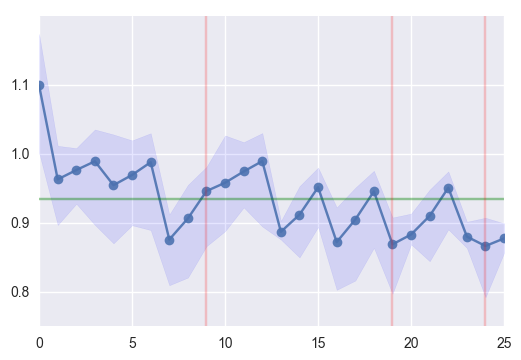

In [541]:
#plt.plot(x,[r[0] for r in overall_result], marker = 'o', label = 'CV error')
plt.plot(np.arange(len(comb_list)),[r[0] for r in overall_result], marker = 'o', label = 'CV error', alpha = 0.9)
plt.fill_between(np.arange(len(comb_list)), 
                 [r[1] for r in overall_result], [r[2] for r in overall_result], color = 'b', alpha=0.1)
plt.axhline(y=mse, color = 'g', alpha = 0.4)
plt.axvline(x=9, color = 'r', alpha = 0.2)
plt.axvline(x=19, color = 'r', alpha = 0.2)
plt.axvline(x=24, color = 'r', alpha = 0.2)

In [494]:
def make_poly(x, y, degrees):
    poly = PolynomialFeatures(degree = degrees)
    x_ = poly.fit_transform(x)
    clf = linear_model.LinearRegression()
    clf.fit(x_, y)
    return clf

In [496]:
degrees = np.arange(1,5,1)
poly_d_result = []
for d in degrees:
    poly_result = []
    for train, test in KFold(len(itrain), n_folds):

        intrain = itrain.iloc[train]
        invalid = itrain.iloc[test]
        
        poly = PolynomialFeatures(degree = d)
        PolyR = make_poly(intrain.drop(['imdb_score'], axis=1), intrain['imdb_score'], d)
        invalid_x = poly.fit_transform(invalid.drop(['imdb_score'], axis=1))
        pred = PolyR.predict(invalid_x)
        
        poly_result.append(mean_squared_error(invalid['imdb_score'], pred))
    
    print(poly_result)
    poly_d_result.append((np.mean(poly_result), np.min(poly_result), np.max(poly_result)))
    
    
print(poly_d_result)

[0.89238428924237634, 0.89934867915054939, 0.86161430715897935, 0.85673439062485968]
[0.87617194646194274, 0.9037475164310268, 0.82904792144557671, 12.583612548821229]
[0.92371740344806019, 8.3215344332900347, 0.84342387780458394, 181746.19282459092]
[1.2185426425474088, 468.44329326314732, 1.1965596394966147, 7925948.4722805126]
[(0.87752041654419122, 0.85673439062485968, 0.89934867915054939), (3.7981449832899439, 0.82904792144557671, 12.583612548821229), (45439.070375076364, 0.84342387780458394, 181746.19282459092), (1981604.8326690143, 1.1965596394966147, 7925948.4722805126)]


In [552]:
poly_mse = [r[0] for r in poly_d_result]
print('mean squared error is the smallest when we use %d degree polynomial regression ' % (1+np.where(poly_mse == np.min(poly_mse))[0][0]))
PolyR = make_poly(itrain.drop(['imdb_score'], axis=1), itrain['imdb_score'], 1)
poly = PolynomialFeatures(degree = 1)
pred = PolyR.predict(poly.fit_transform(itest.drop(['imdb_score'], axis=1)))
mse = mean_squared_error(itest['imdb_score'],pred)

mean squared error is the smallest when we use 1 degree polynomial regression 


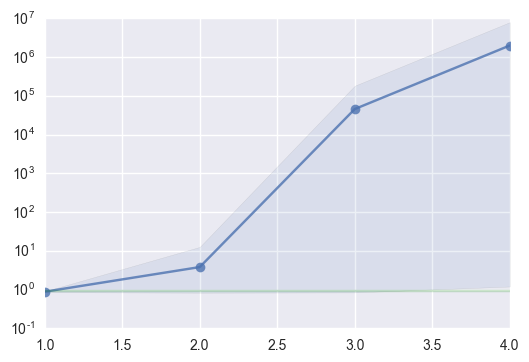

In [553]:
plt.plot(degrees, [r[0] for r in poly_d_result], 'o-', label = 'CV error', alpha = 0.8)
plt.fill_between(degrees, [r[1] for r in poly_d_result], [r[2] for r in poly_d_result], alpha = 0.1)
plt.axhline(y = mse, color = 'green', alpha = 0.2)
plt.yscale('log')